# Introdução

A Transformada de Fourier é uma técnica matemática fundamental na análise de sinais e processamento de dados. Ela permite decompor um sinal no domínio do tempo em suas componentes de frequência, revelando as diferentes frequências presentes no sinal. Isso é crucial em diversas aplicações, como processamento de áudio, imagem, comunicações e análise de dados. A transformada de Fourier é amplamente usada para filtragem de sinais, compressão de dados, detecção de padrões e muito mais, tornando-se uma ferramenta essencial na área de processamento de sinais e ciência de dados.

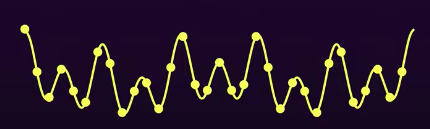

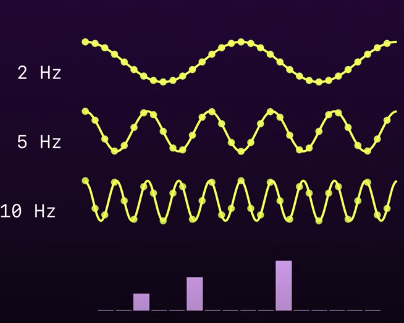

Neste notebook vamos trabalhar com a trasnformada de Fourier em python. O conteúdo é baseado [neste vídeo](https://www.youtube.com/watch?v=yYEMxqreA10&t=246s&ab_channel=Reducible).

# Importar sinal

In [2]:
#gdown 1_l9vW1x2lgE8r5aP6psdDlOdGnDhMDAo #sinal que iremos trabalhar

In [4]:
import numpy as np

signal = np.load('signal_example_fs100.npz')['arr_0']

# Visualizar Sinal

In [ ]:
# @title Definir parâmetros de plots

'''
Este código só define algumas características dos plots que iremos fazer para ficar
mais bonito e com o código mais limpo
'''
from warnings import simplefilter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'

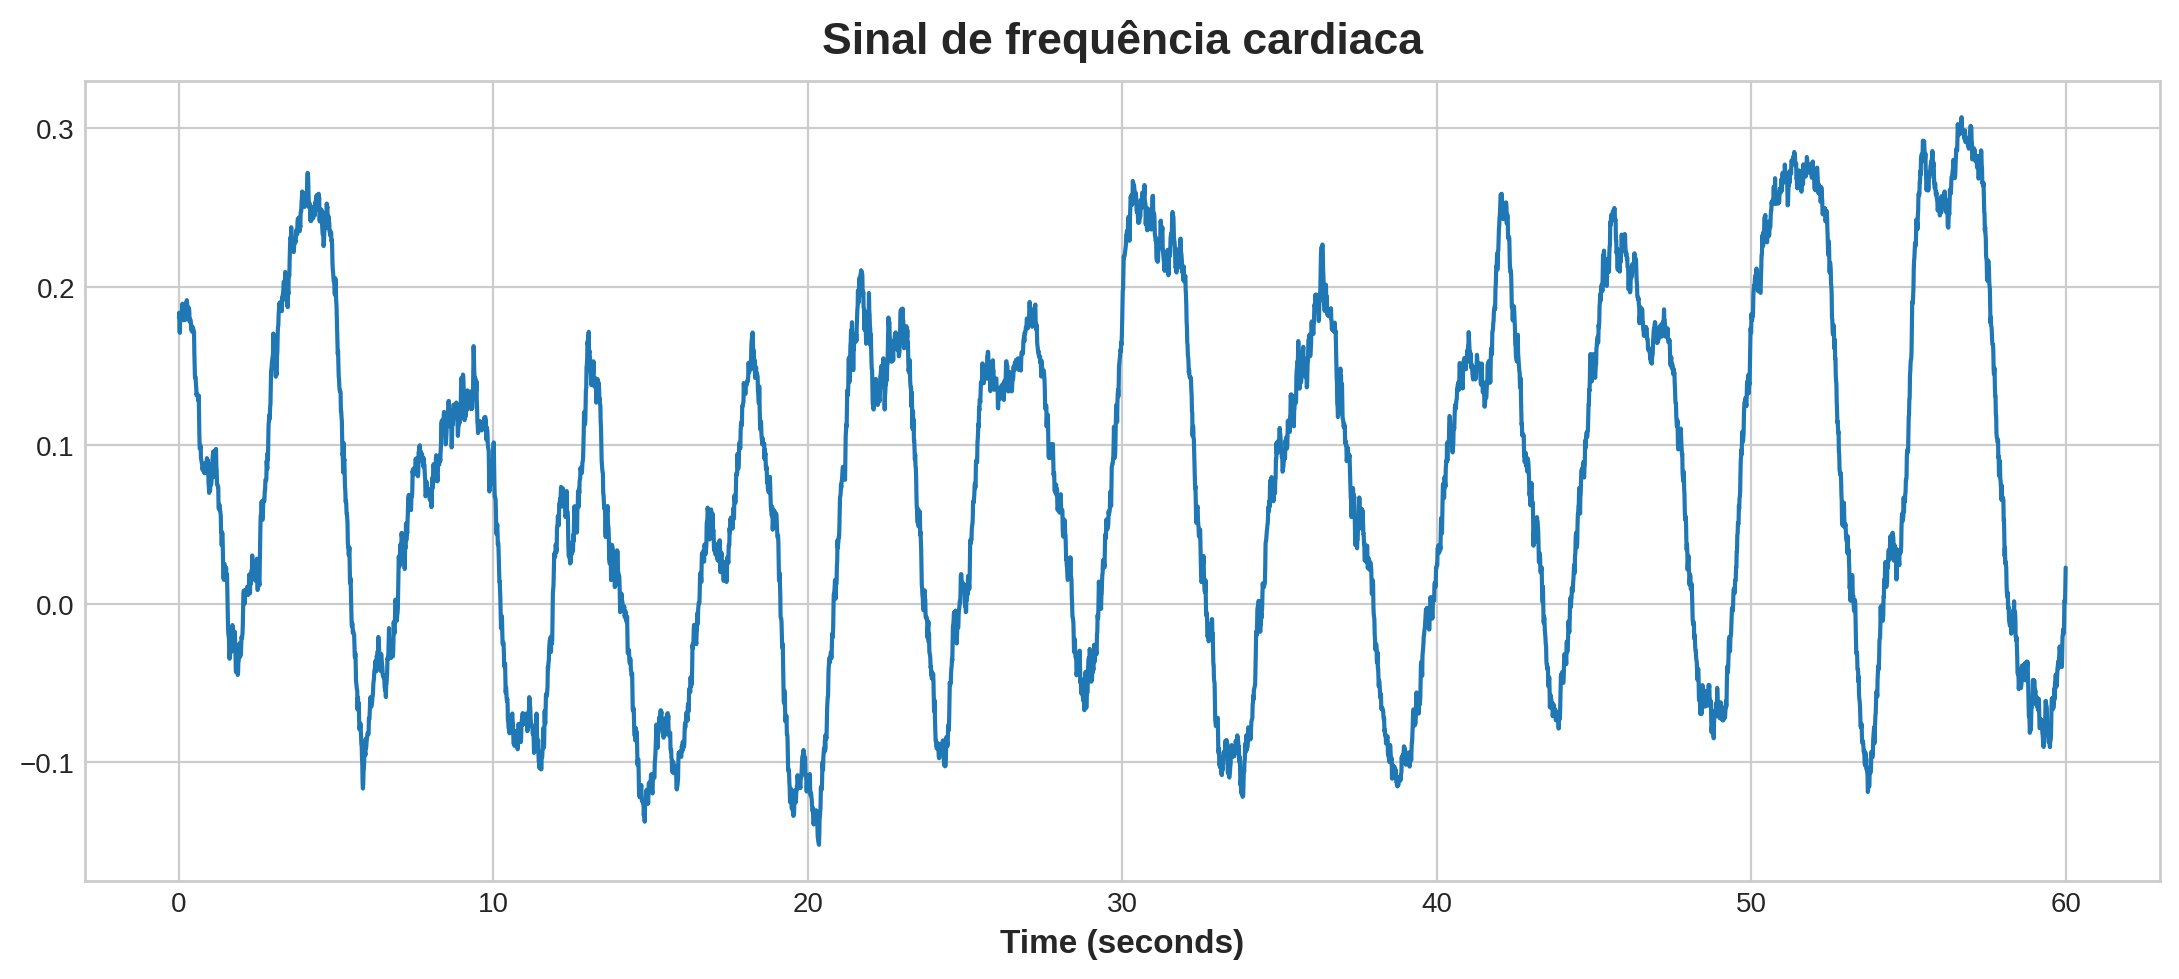

In [ ]:
# Calculate the time values
sampling_frequency = 100
time = np.arange(0, len(signal)) / sampling_frequency

# Plot the signal with a time-axis label
plt.plot(time, signal)
plt.title('Sinal de frequência cardiaca')
plt.xlabel('Time (seconds)')
plt.show()

# Fourier

Vamos direto ao assunto! Lembrando que o objetivo da transformada de fourier é criar uma outra representação do sinal, uma representação que traz mais informação sobre as frequências que este sinal possui.A transformada de fourier (entendendo ela como um função) recebe uma lista como entrada e retorna uma outra lista. Vamos então para o código.

In [ ]:
# Para usar a transformada de fourier, utilize np.fft.fft

signal_fft = np.fft.fft(signal)

- Qual o tipo de dado que a transformada retorna?

In [ ]:
print('Tipo: ',signal_fft.dtype)
print('Exemplo: ',signal_fft[0])

Tipo:  complex128
Exemplo:  (451.432011467328+0j)


A explicação do porque np.fft.fft retorna números complexos está fora do âmbito deste notebook, mas no [vídeo](https://www.youtube.com/watch?v=yYEMxqreA10&t=246s&ab_channel=Reducible) citado anteriormente, há uma explicação detalhada.

- Para que a gente possa obter a amplitude de cada número complexo vamos tirar o valor absoluto da lista "signal_fft"

In [ ]:
magnitude = np.abs(signal_fft)
magnitude

array([451.43201147, 126.83983506,  96.01332402, ...,  70.71994358,
        96.01332402, 126.83983506])

## Plot de Fourier

Vamos plotar nosso sinal em Fourier!

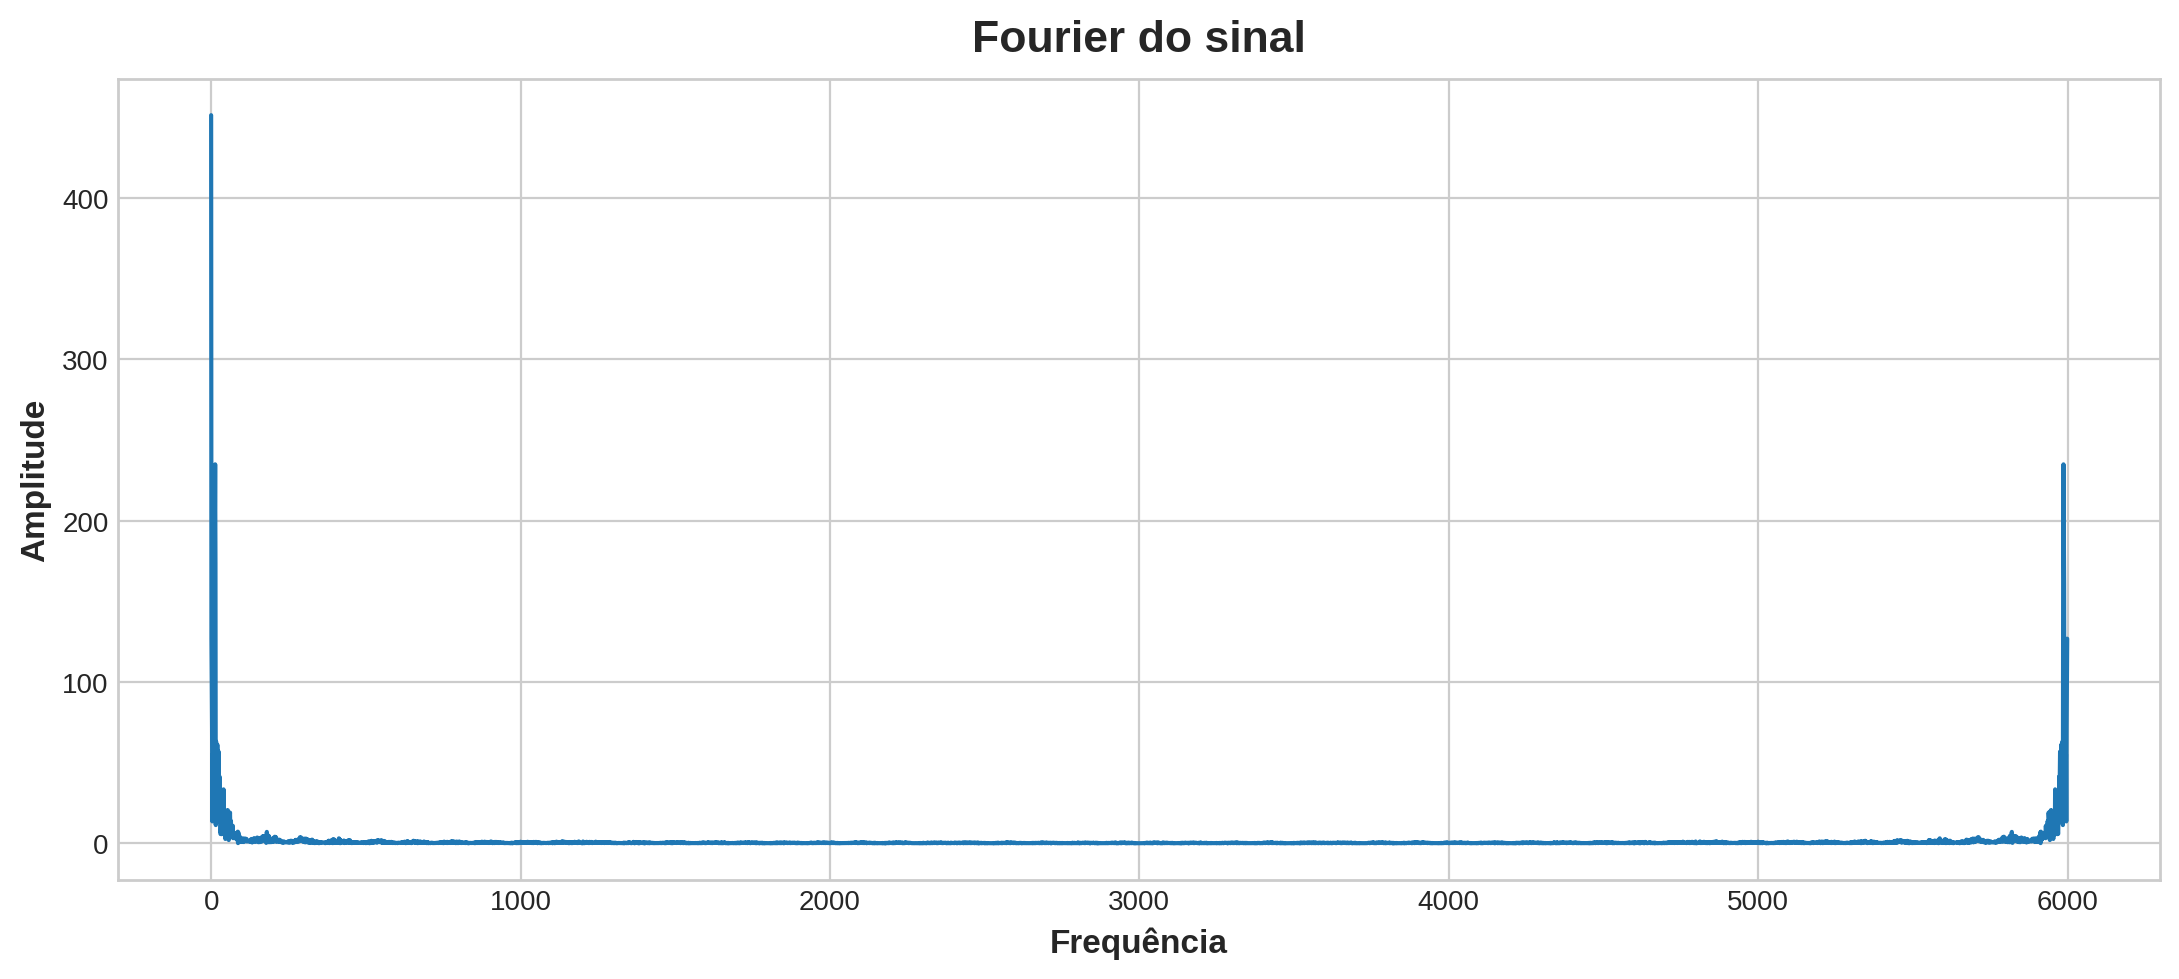

In [ ]:
plt.title('Fourier do sinal')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.plot(magnitude)
plt.show()

Podemos ver que não é muito informativo né? Bom, isto acontece pq normalmente frequências altas possuem amplitudes muito baixas. Assim, a informação que mais nos importa são só as primeiras frequências.

Vamos plotar só os primeiros 200 valores.

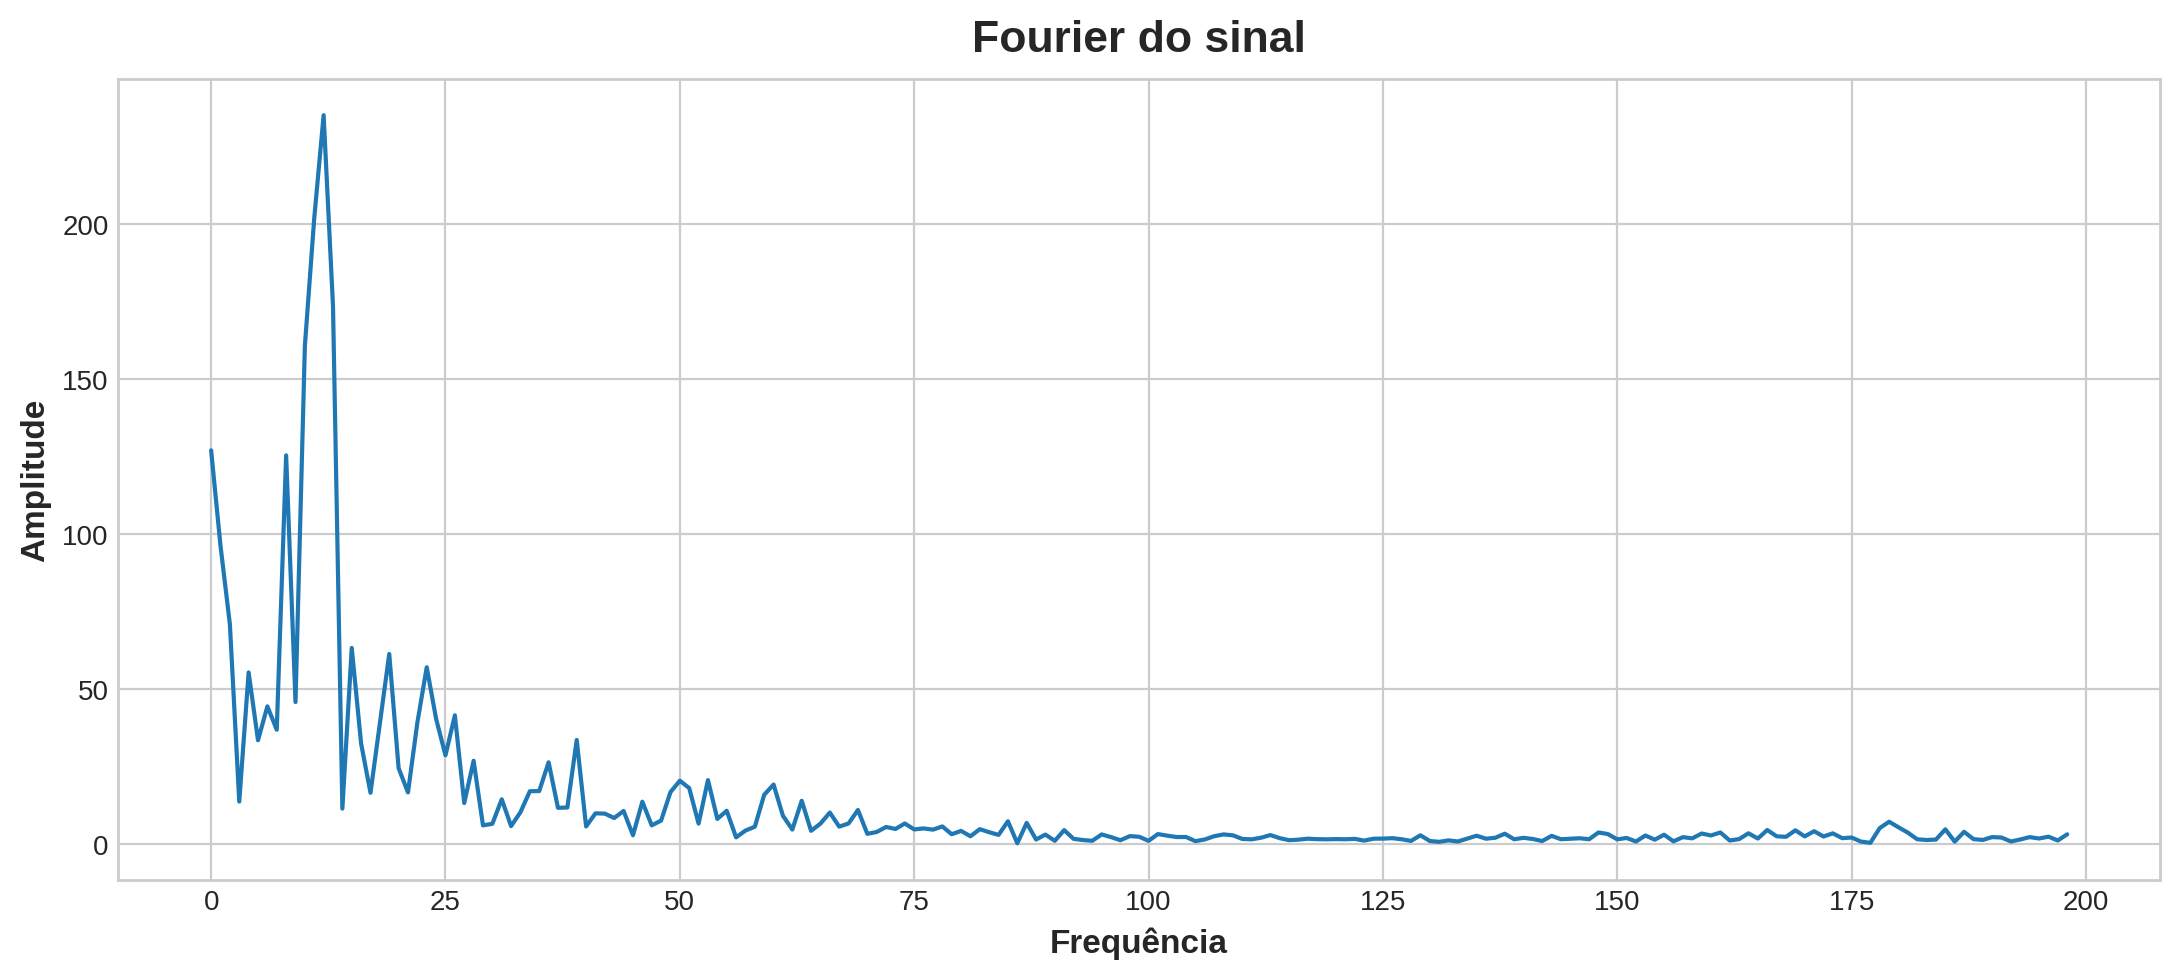

In [ ]:
plt.title('Fourier do sinal')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.plot(magnitude[1:200])
plt.show()

Consegue ver que na frequência "10" há um pico? Bom, isto é um indicativo que esta frequência compoem o sinal muito mais que qualquer outra frequência. Mas que frequência é esta em Hertz?

- Calcular frequência em hertz

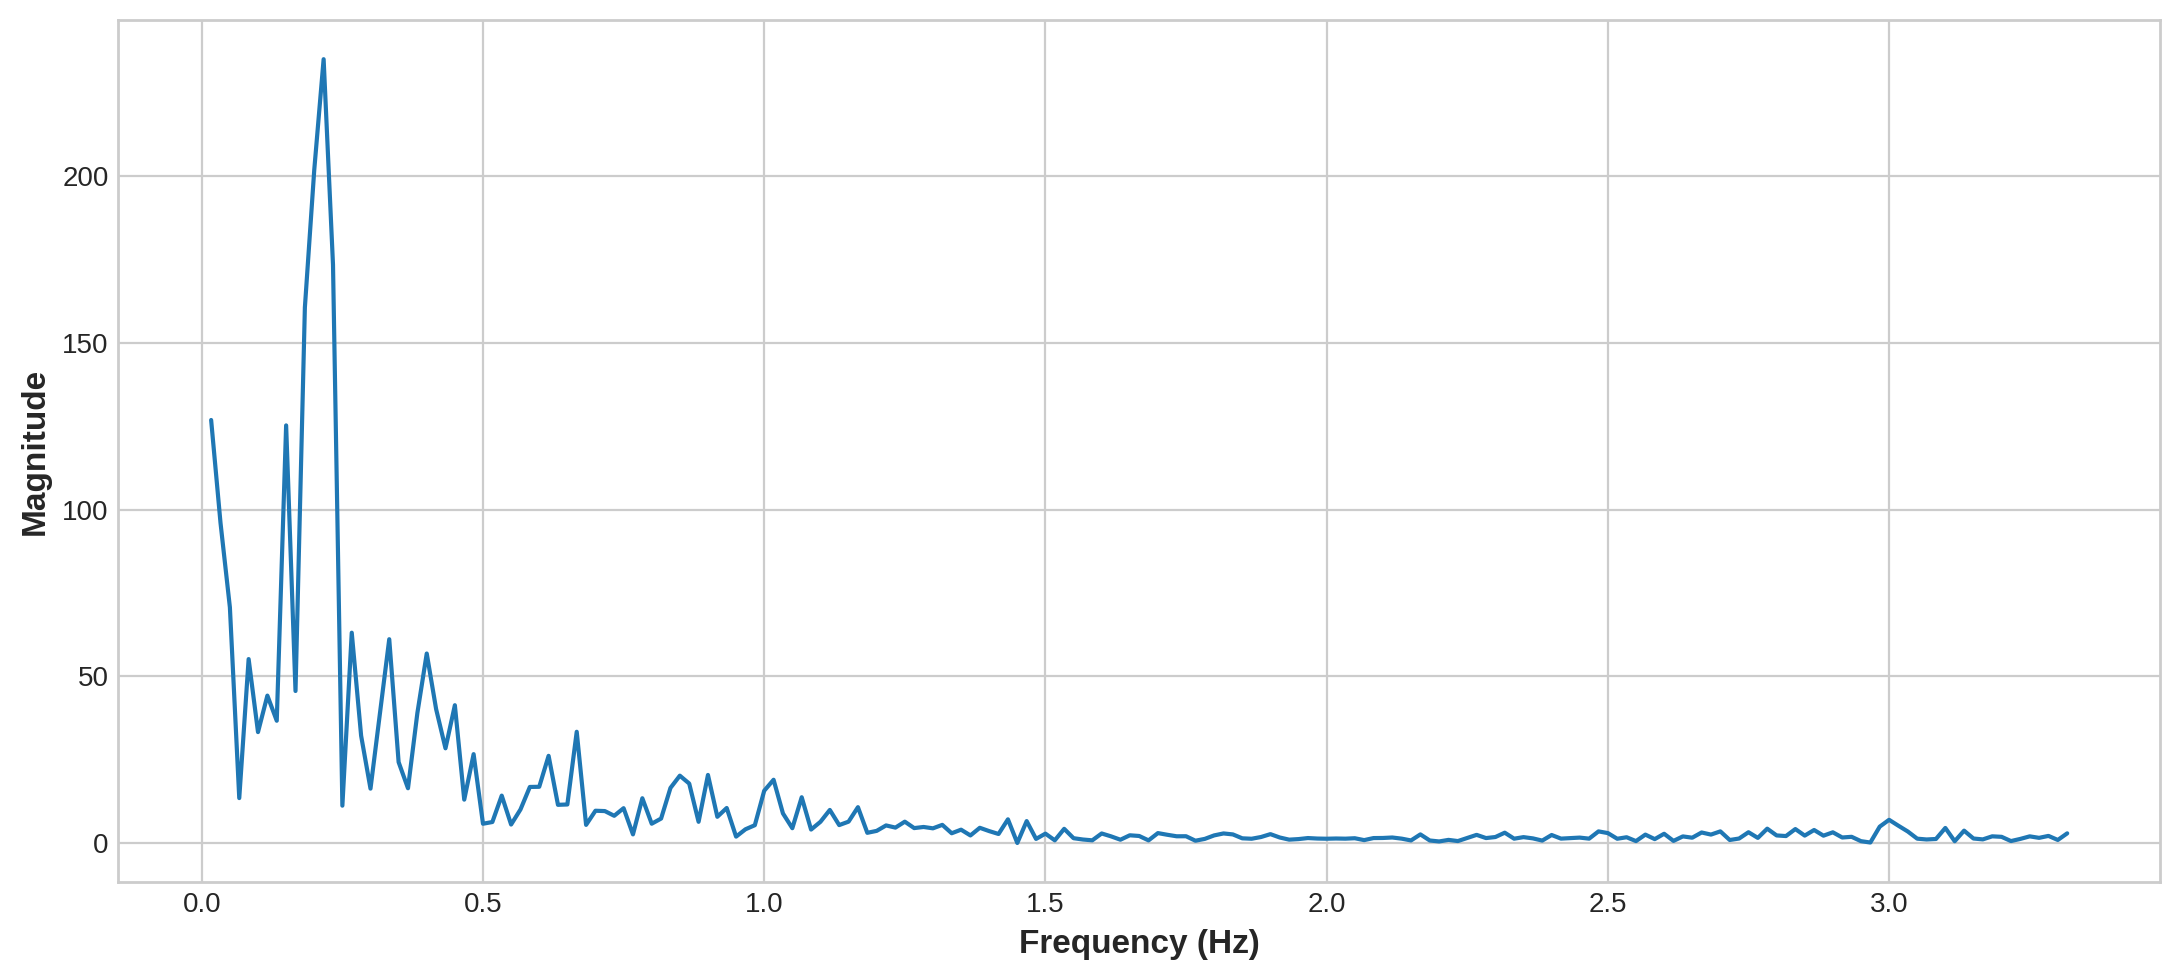

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defina a frequência de amostragem e o comprimento do sinal
sampling_frequency = 100
signal_length = 6000

# Calcule o eixo de frequência
frequency_axis = np.fft.fftfreq(signal_length, 1 / sampling_frequency)

# Plote os primeiros 200 valores
plt.plot(frequency_axis[1:200], magnitude[1:200])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()
